In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import streamlit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

##### Explanation of Relavence of Dataset
##### This dataset contains 3150 rows, and 14 colums, which is a sweet sport as it does not slow down the machine while can still make a good model. Addition to that the dataset is a very practical dataset, as it comes from Iran, from actual telecom company. The classification is rather simple, 'either the customer or not' but, it consists of many factors to consider, importance of each column, how to create a view that the manager can input the data and get weather the person is still the customer or not easily/ It aligns with my intention to create simple but practical tool that can help the a normal telecorm office worker to easily indentify whether he/she is the valuable the customer or not.

In [ ]:
df=pd.read_csv('dataset/Customer_Churn.csv')
df.head()

(3150, 14)

In [20]:
col_bi_cov = ['Status', 'Tariff Plan']

# convert binary values [1 or 2] to [0 and 1]

mapping = {1:0, 2:1}

for col in col_bi_cov:
    df[col] = df[col].replace(mapping)

df.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,0,0,30,197.640,0
1,0,0,39,0,318,5,7,4,2,0,1,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,0,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,0,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,0,15,145.805,0


In [21]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,0.077778,0.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,0.000000,0.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,0.000000,0.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,0.000000,0.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,1.000000,1.000000,55.000000,2165.280000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

##### There are no missing values in this dataset.

In [23]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [24]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

##### This is an unbalanced dataset, and we have to use smote or other balancing methods in the pipeline.

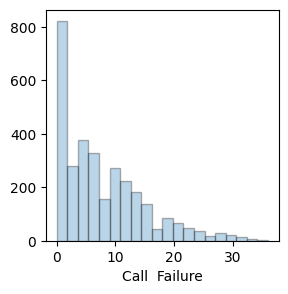

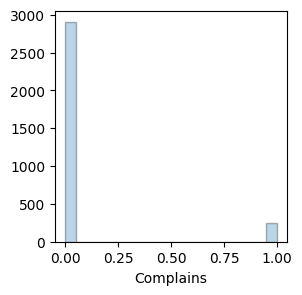

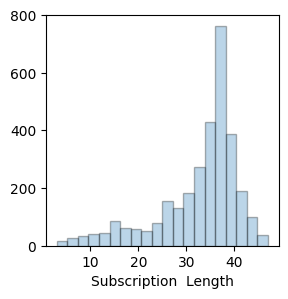

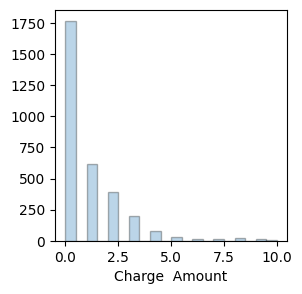

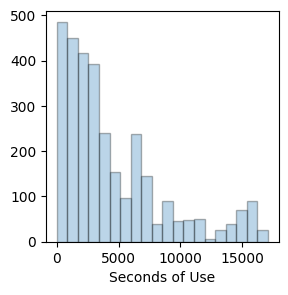

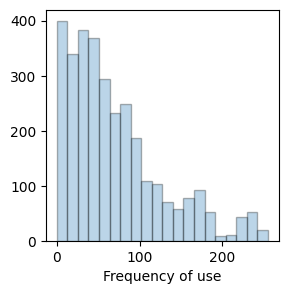

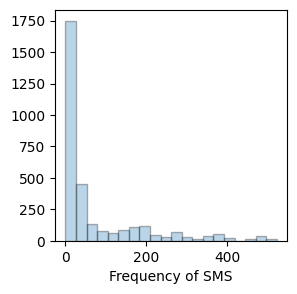

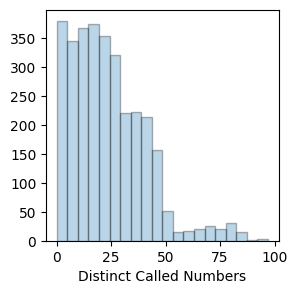

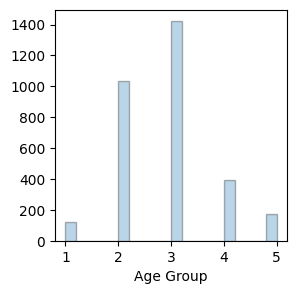

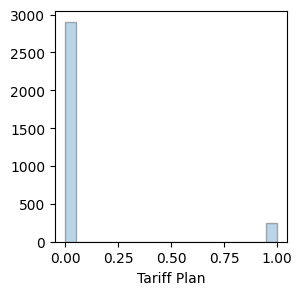

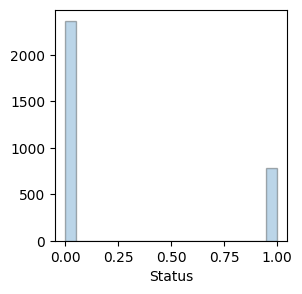

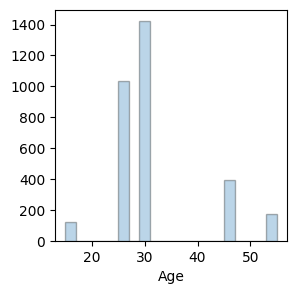

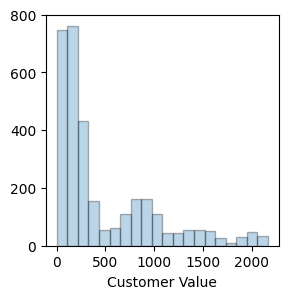

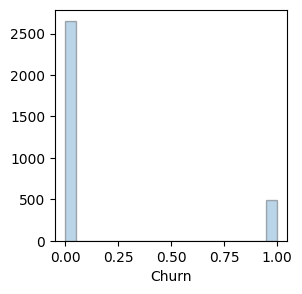

In [25]:
for i in df.columns:
    plt.figure(figsize=(3,3))
    plt.hist(df[i], edgecolor='black', alpha=0.3, bins=20)
    plt.xlabel(i)
    plt.show()

##### When we look at the histograms, there are skewed data distribution, and ordinal data endoced back into numeric values, therefore. We have to use standard scaler since the some of the max value will widen the whole range, and min-max scaler is not applicable in this case.

In [26]:
X = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

##### Based on the given data there are two types to predict churn and non-churn, and logistic regression is good for this case. First we must have to construct a pipeline to get the first model, and based on the results, we will consider improving the model.
##### The pipeline should go frist with using standard scaler for all numeric columns except target, this will transform endoced discrete values but will still maintain the order natrure. And then we will apply logistic regression towards all of the columsn. 

In [27]:

col_to_scale = df.drop(columns= ['Churn'], axis=1).columns.tolist()

pre_processor = ColumnTransformer(transformers= [
                    ('num', StandardScaler(), col_to_scale)])      

lr = LogisticRegression(random_state=42, class_weight='balanced')

full_pipeline = Pipeline(steps=[
                    ('pre_processor', pre_processor),
                    ('regressor', lr)])

full_pipeline.fit(X_train,y_train)          

,steps,"[('pre_processor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


##### We have used class_weight = balanced parameter of logistic regression, instead of smote to reduce the code line, and it is also clearer. 

In [28]:
y_pred = full_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Test Set Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Test Set Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"Test Set F1 Score: {f1:.4f}")

Test Set Accuracy: 0.8317
Test Set Precision: 0.5112
Test Set Recall: 0.8273
Test Set F1 Score: 0.6319


##### we got Accuracy of 0.8317, and recall of 82.73, but precision is only 0.5112, it is less compared to other results. We can consider removing some columns to increase the processing time, increase the performence, and also not ask for fewer information from user in the streamlit.

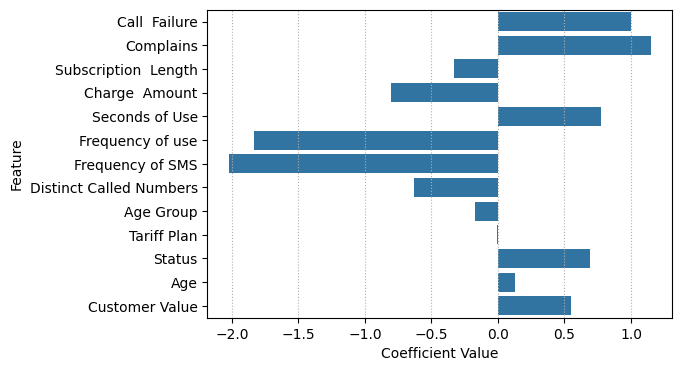

In [29]:
# to get good predictions, we need to look at coefficients to understand their impact towards the result.

model = full_pipeline.fit(X_train, y_train)

coefficients = model['regressor'].coef_.flatten()

col_to_pass_through = [col for col in X_train.columns if col not in col_to_scale]
feature_names_ordered = col_to_scale + col_to_pass_through

coef_df = pd.DataFrame({
    'Feature': feature_names_ordered,
    'Coefficient (Scaled)': coefficients})


plt.figure(figsize=(6, 4))
sns.barplot(
    data=coef_df, 
    x='Coefficient (Scaled)', 
    y='Feature')

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle=':')
plt.show()

##### Coefficients of Tarrif Plan is nearly zero. It has nearly no impact on the result.
##### Coefficient of Age group and Age is also very low. We can drop any one of them as they give the same information.

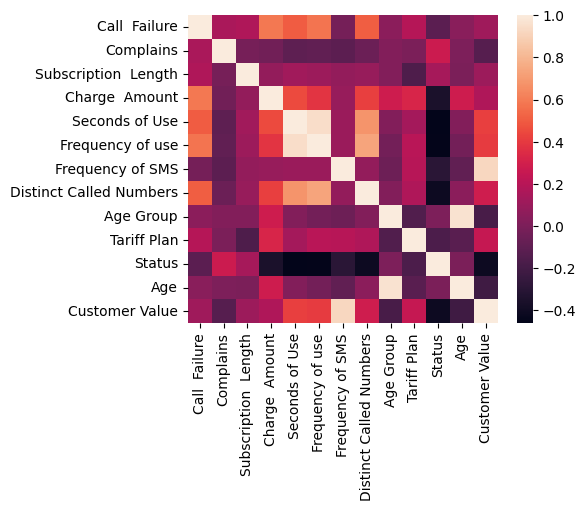

In [30]:
cor_matrix = X.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(cor_matrix)
plt.show()

##### 'Age Group' and 'Age have strong correltion meaning that these two gives the same information and we can remove either one of those. Since 'Age' has lower coefficient value, we will remove age.

##### Although tarrif plan does not correlates with othe columns, it has nearly zero correlation and we can ignore it, we will drop 'Tariff'.

##### 'Frequency of SMS' has strong correlation with Customer value, but they have high coefficients and we cannot easily drop as it will sagnificantly affect the odel performence. The same is goes for 'Status.

##### To condluce we will drop 'Age', and 'Tariff' columns and run again. 

In [31]:
# drop two columns

df = df.drop(columns=['Age', 'Tariff Plan'], axis=1)

# run the model again

X = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

col_to_scale = df.drop(columns= ['Churn'], axis=1).columns.tolist()

pre_processor = ColumnTransformer(transformers= [
                    ('num', StandardScaler(), col_to_scale)],
                    remainder = 'passthrough')      

lr = LogisticRegression(random_state=42, class_weight='balanced')

full_pipeline = Pipeline(steps=[
                    ('pre_processor', pre_processor),
                    ('regressor', lr)])


full_pipeline.fit(X_train,y_train) 
y_pred = full_pipeline.predict(X_test)

# model evaluation again
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Test Set Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Test Set Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"Test Set F1 Score: {f1:.4f}")

Test Set Accuracy: 0.8333
Test Set Precision: 0.5140
Test Set Recall: 0.8364
Test Set F1 Score: 0.6367


In [32]:
type(y_pred)

numpy.ndarray

##### We can see that the model improved below two decimal points, and we can use the model now.

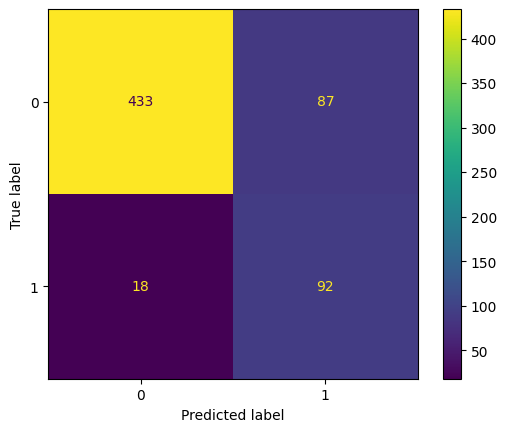

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
            confusion_matrix=conf_mat,
            display_labels=lr.classes_)

disp.plot()

In [34]:
with open('c_churn_model.pkl', 'wb') as f:
    pickle.dump(full_pipeline, f)

with open('c_churn_model.pkl', 'rb') as file:
    loaded_model= pickle.load(file)

loaded_model

,steps,"[('pre_processor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
